# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *R*

**Names:**

* *Raphaël Barman*
* *Raphael Strebel*
* *Thierry Bossy*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [64]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [65]:
with open('../data/network1.csv') as f:
    lines = f.readlines()
edges = [line.strip().split(',') for line in lines if not line.startswith('#')]
graph = nx.Graph()
graph.add_edges_from(edges)

In [66]:
print("Number of nodes:", nx.number_of_nodes(graph))
print("Number of edges:", nx.number_of_edges(graph))

Number of nodes: 13033
Number of edges: 18584


#### Exercise 2.2:  Node degree distribution

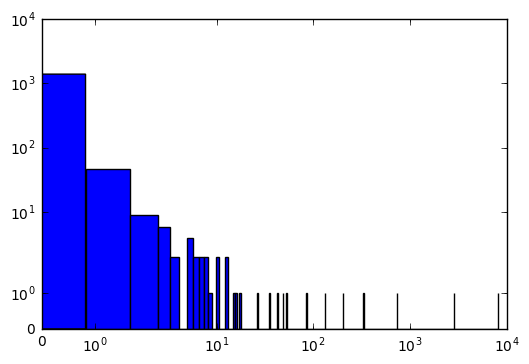

In [67]:
node_degree = nx.degree(graph)
histogram = nx.degree_histogram(graph)
plt.hist(histogram, bins=10000);
plt.xscale('symlog') 
plt.yscale('symlog') 
plt.show()

#### Exercise 2.3: Giant component

In [68]:
print("Number of connected components:", nx.number_connected_components(graph))
giant_candidate = max(nx.connected_component_subgraphs(graph), key=nx.number_of_nodes)
print("Number of nodes of the biggest connected components:", nx.number_of_nodes(giant_candidate))
print("Ratio:", nx.number_of_nodes(giant_candidate)/nx.number_of_nodes(graph))

Number of connected components: 192
Number of nodes of the biggest connected components: 12576
Ratio: 0.9649351645822144


This is CLEARLY a giant component

In [70]:
giant_component = giant_candidate

#### Exercise 2.4: Short paths & Small-worlds

In [77]:
#print("longest path between any pair of nodes:", nx.diameter(giant_component)) # = 12

#average (shortest path) length between pair of vertices
print(nx.average_shortest_path_length(giant_component)) # = 4.175488076629283


4.175488076629283


#### Exercise 2.5: Network comparison

In [60]:
with open('../data/network2.csv') as f:
    lines2 = f.readlines()
edges2 = [line.strip().split(',') for line in lines2 if not line.startswith('#')]
graph2 = nx.Graph()
graph2.add_edges_from(edges2)

In [31]:
print("Number of nodes:", nx.number_of_nodes(graph))
print("Number of edges:", nx.number_of_edges(graph))

Number of nodes: 26542
Number of edges: 43516


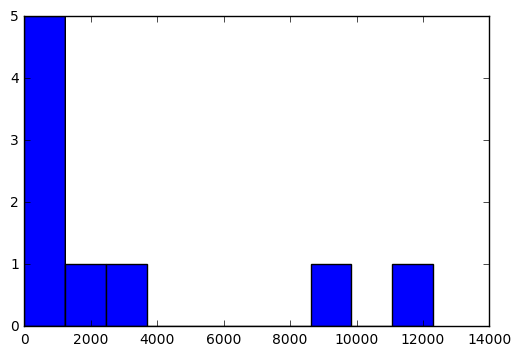

In [37]:
histogram2 = nx.degree_histogram(graph)
plt.hist(histogram2);
plt.show()

In [59]:
print("Number of connected components:", nx.number_connected_components(graph2))
giant_candidate2 = max(nx.connected_component_subgraphs(graph2), key=nx.number_of_nodes)
print("Number of nodes of the biggest connected components:", nx.number_of_nodes(giant_candidate2))
print("Ratio:", nx.number_of_nodes(giant_candidate2)/nx.number_of_nodes(graph2))

#TODO compute size of smaller components

Number of connected components: 5
Number of nodes of the biggest connected components: 26481
Ratio: 0.9977017557079346


We can see that there is one giant component that includes almost all the network (except for 4 small connected components) whereas the first network had a greater amount of smaller connected components.

#### Exercise 2.6: Network identification

Wild guess : The first is the subgraph of routers comprising the Internet because ...
The second is the road network of New York because all roads are connected (except for rare exceptions).